<a href="https://colab.research.google.com/github/AlexdeLuna79/Datamining/blob/main/ArboldeDecision_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris=load_iris()

In [ ]:
x=iris.data
y=iris.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target)

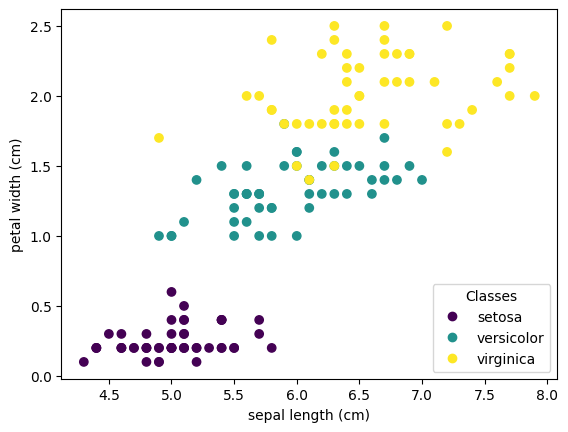

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
arbol=DecisionTreeClassifier()

In [ ]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier()

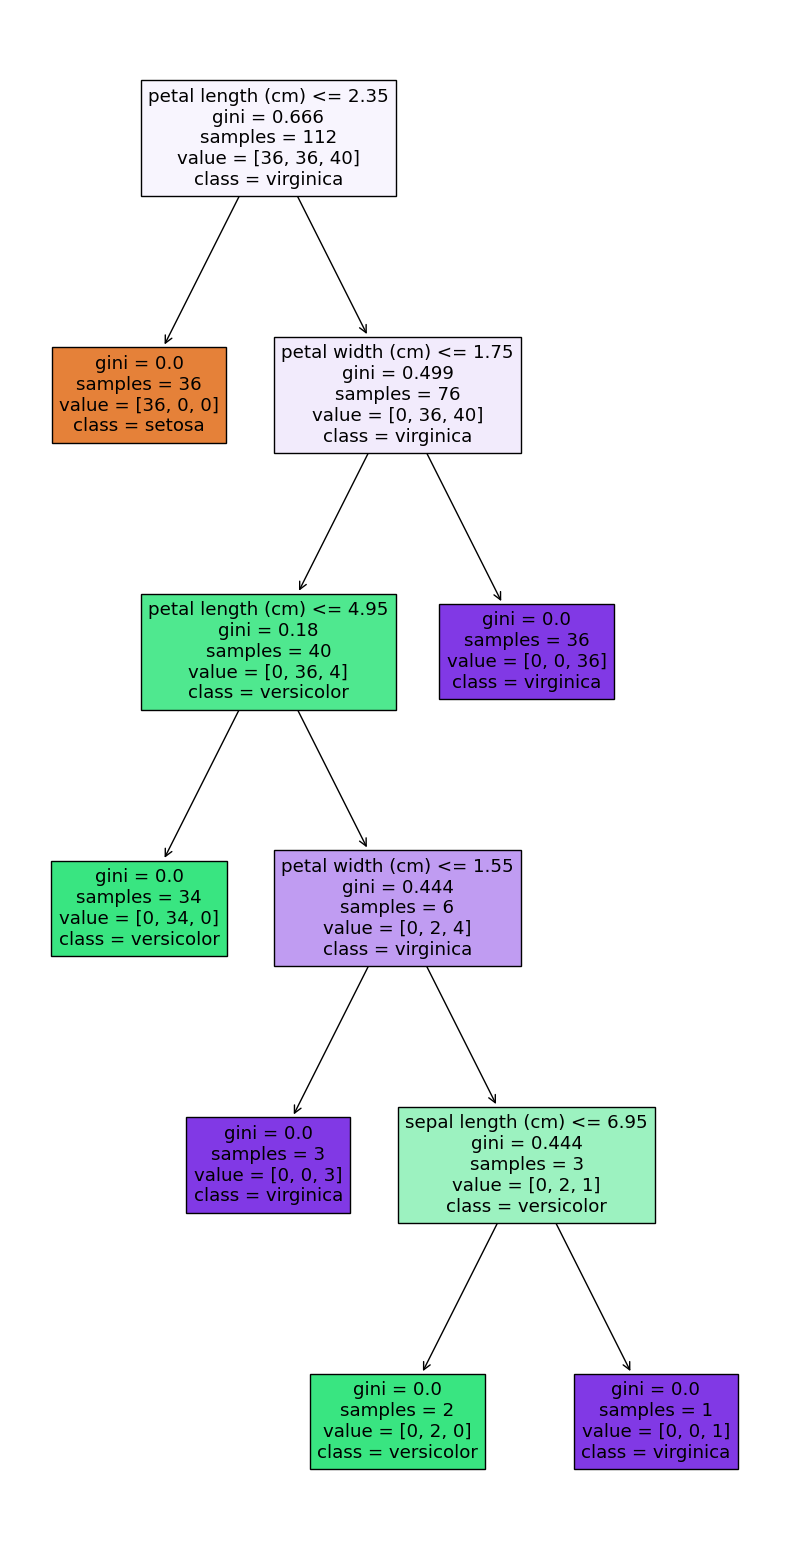

In [ ]:
fig = plt.figure(figsize=(10,20))
_=tree.plot_tree(arbol,feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
arbol.score(x_train,y_train) #overfitting

1.0

In [ ]:
arbol.score(x_test,y_test)

0.9473684210526315

In [ ]:
y_pred=arbol.predict(x_test)

In [ ]:
import pandas as pd
caract=iris.data.shape[1]

In [ ]:
arbol.feature_importances_

array([0.01787995, 0.        , 0.55262486, 0.42949519])

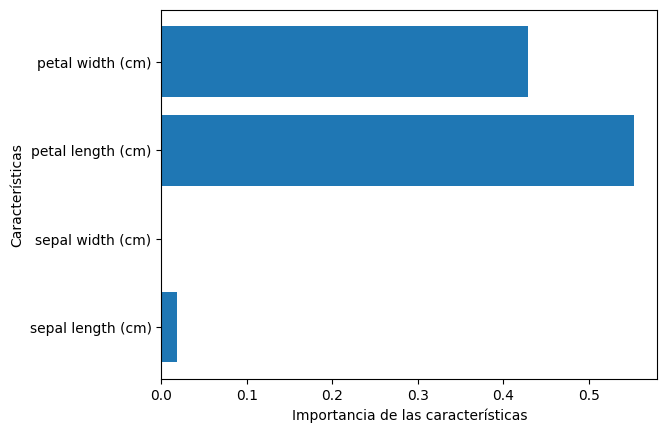

In [ ]:
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

In [ ]:
arbol=DecisionTreeClassifier(max_depth=3)

In [ ]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

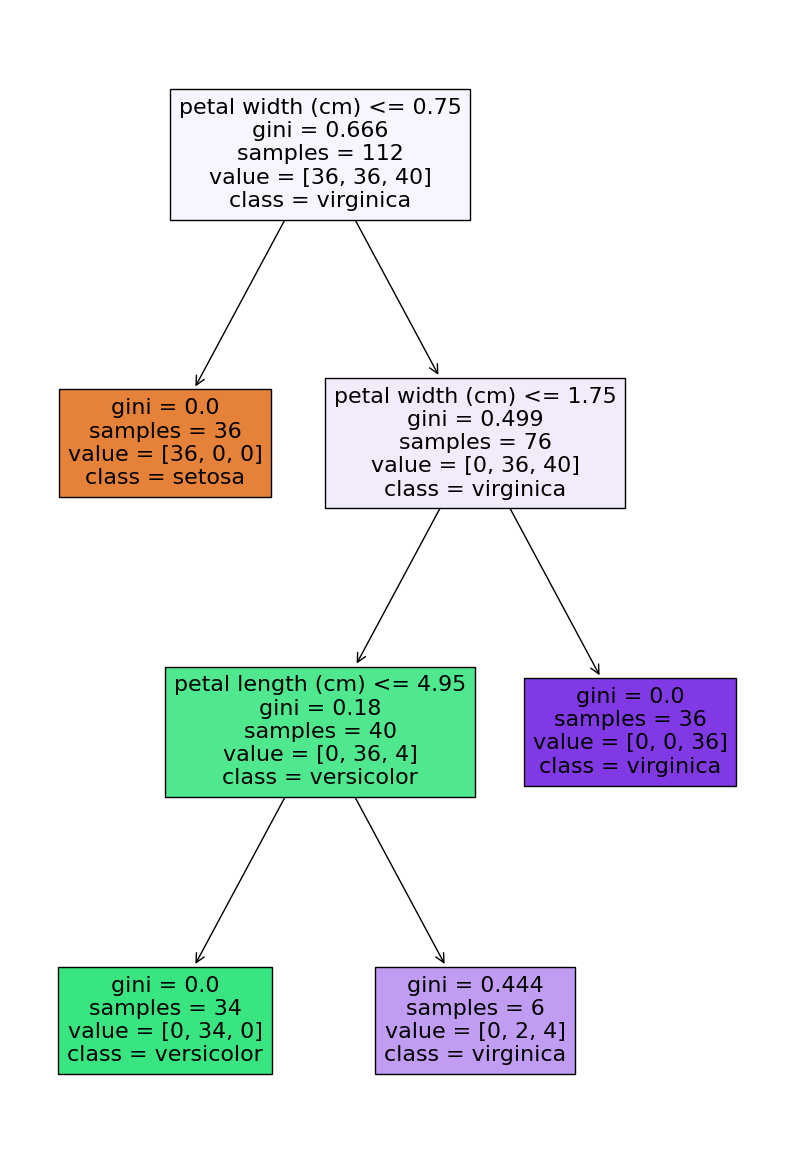

In [ ]:
fig = plt.figure(figsize=(10,15))
_=tree.plot_tree(arbol,feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
arbol=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [ ]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

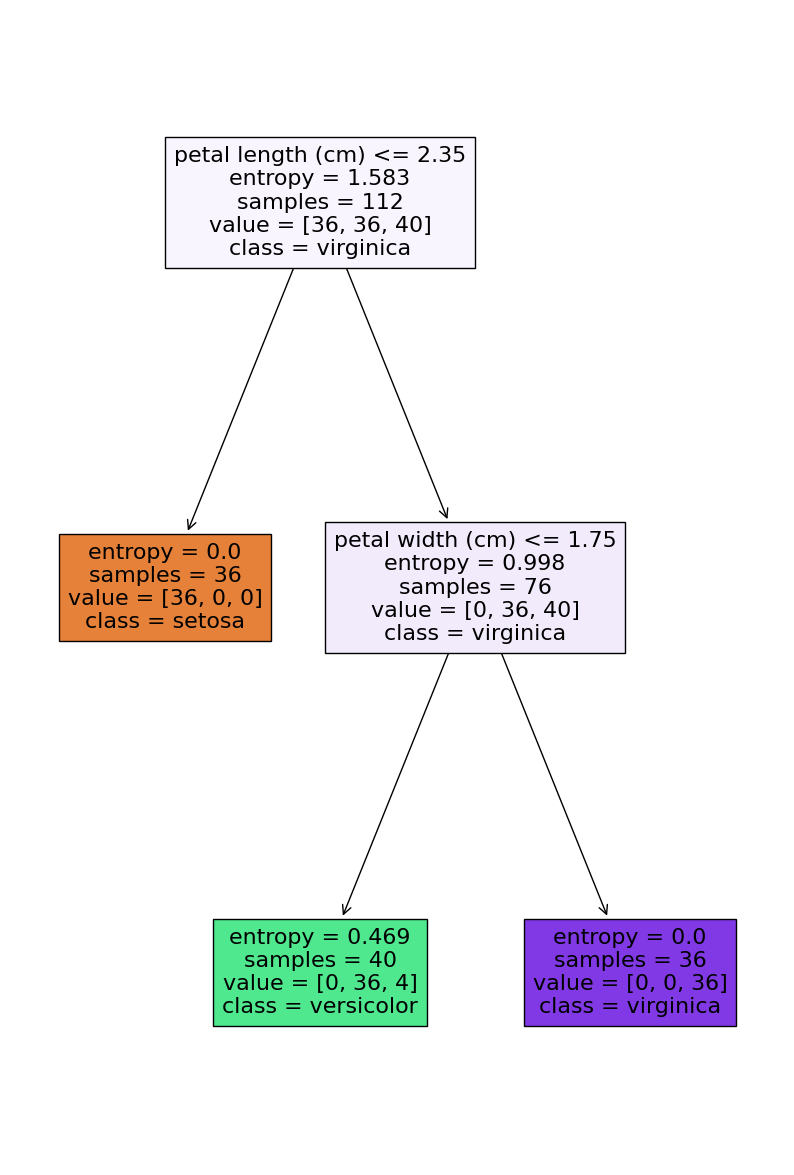

In [ ]:
fig = plt.figure(figsize=(10,15))
_=tree.plot_tree(arbol,feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
arbol=DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=3)

In [ ]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

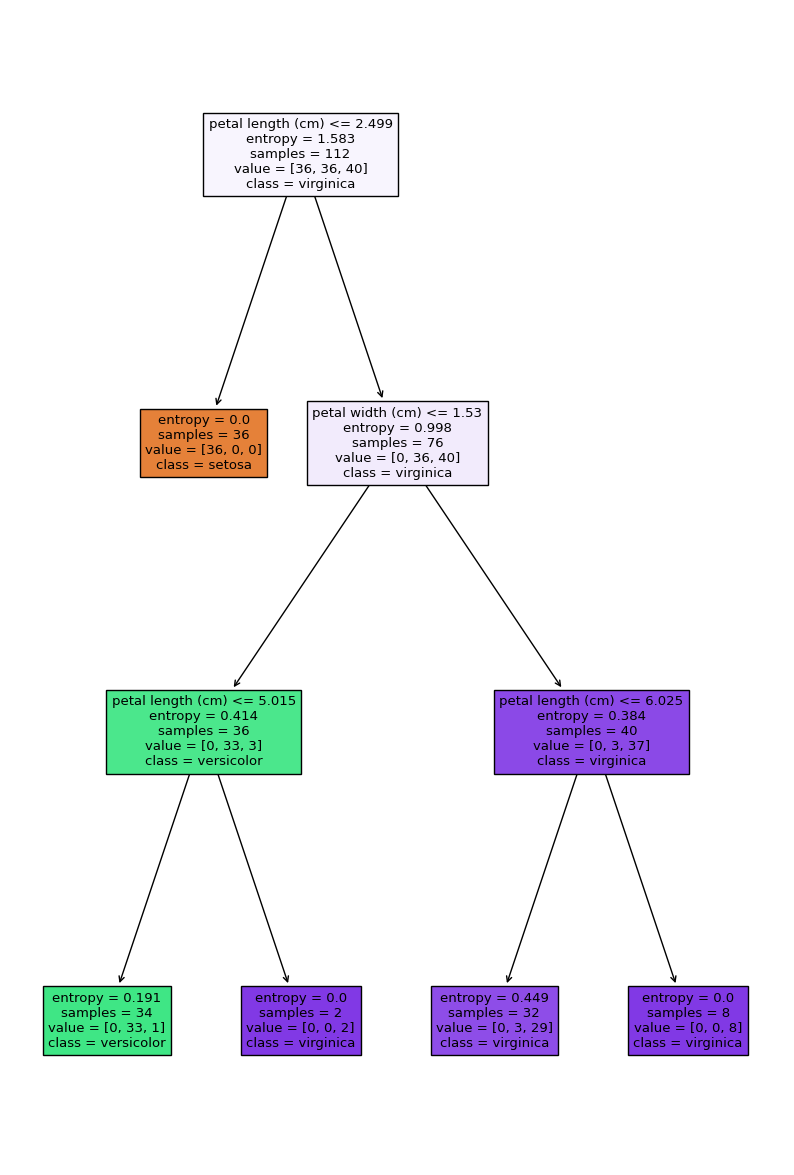

In [ ]:
fig = plt.figure(figsize=(10,15))
_=tree.plot_tree(arbol,feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package
fig = plt.figure(figsize=(25,20))
viz = dtreeviz(arbol, x, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py)

In [ ]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
<ipython-input-37-2ca7f4d87765>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


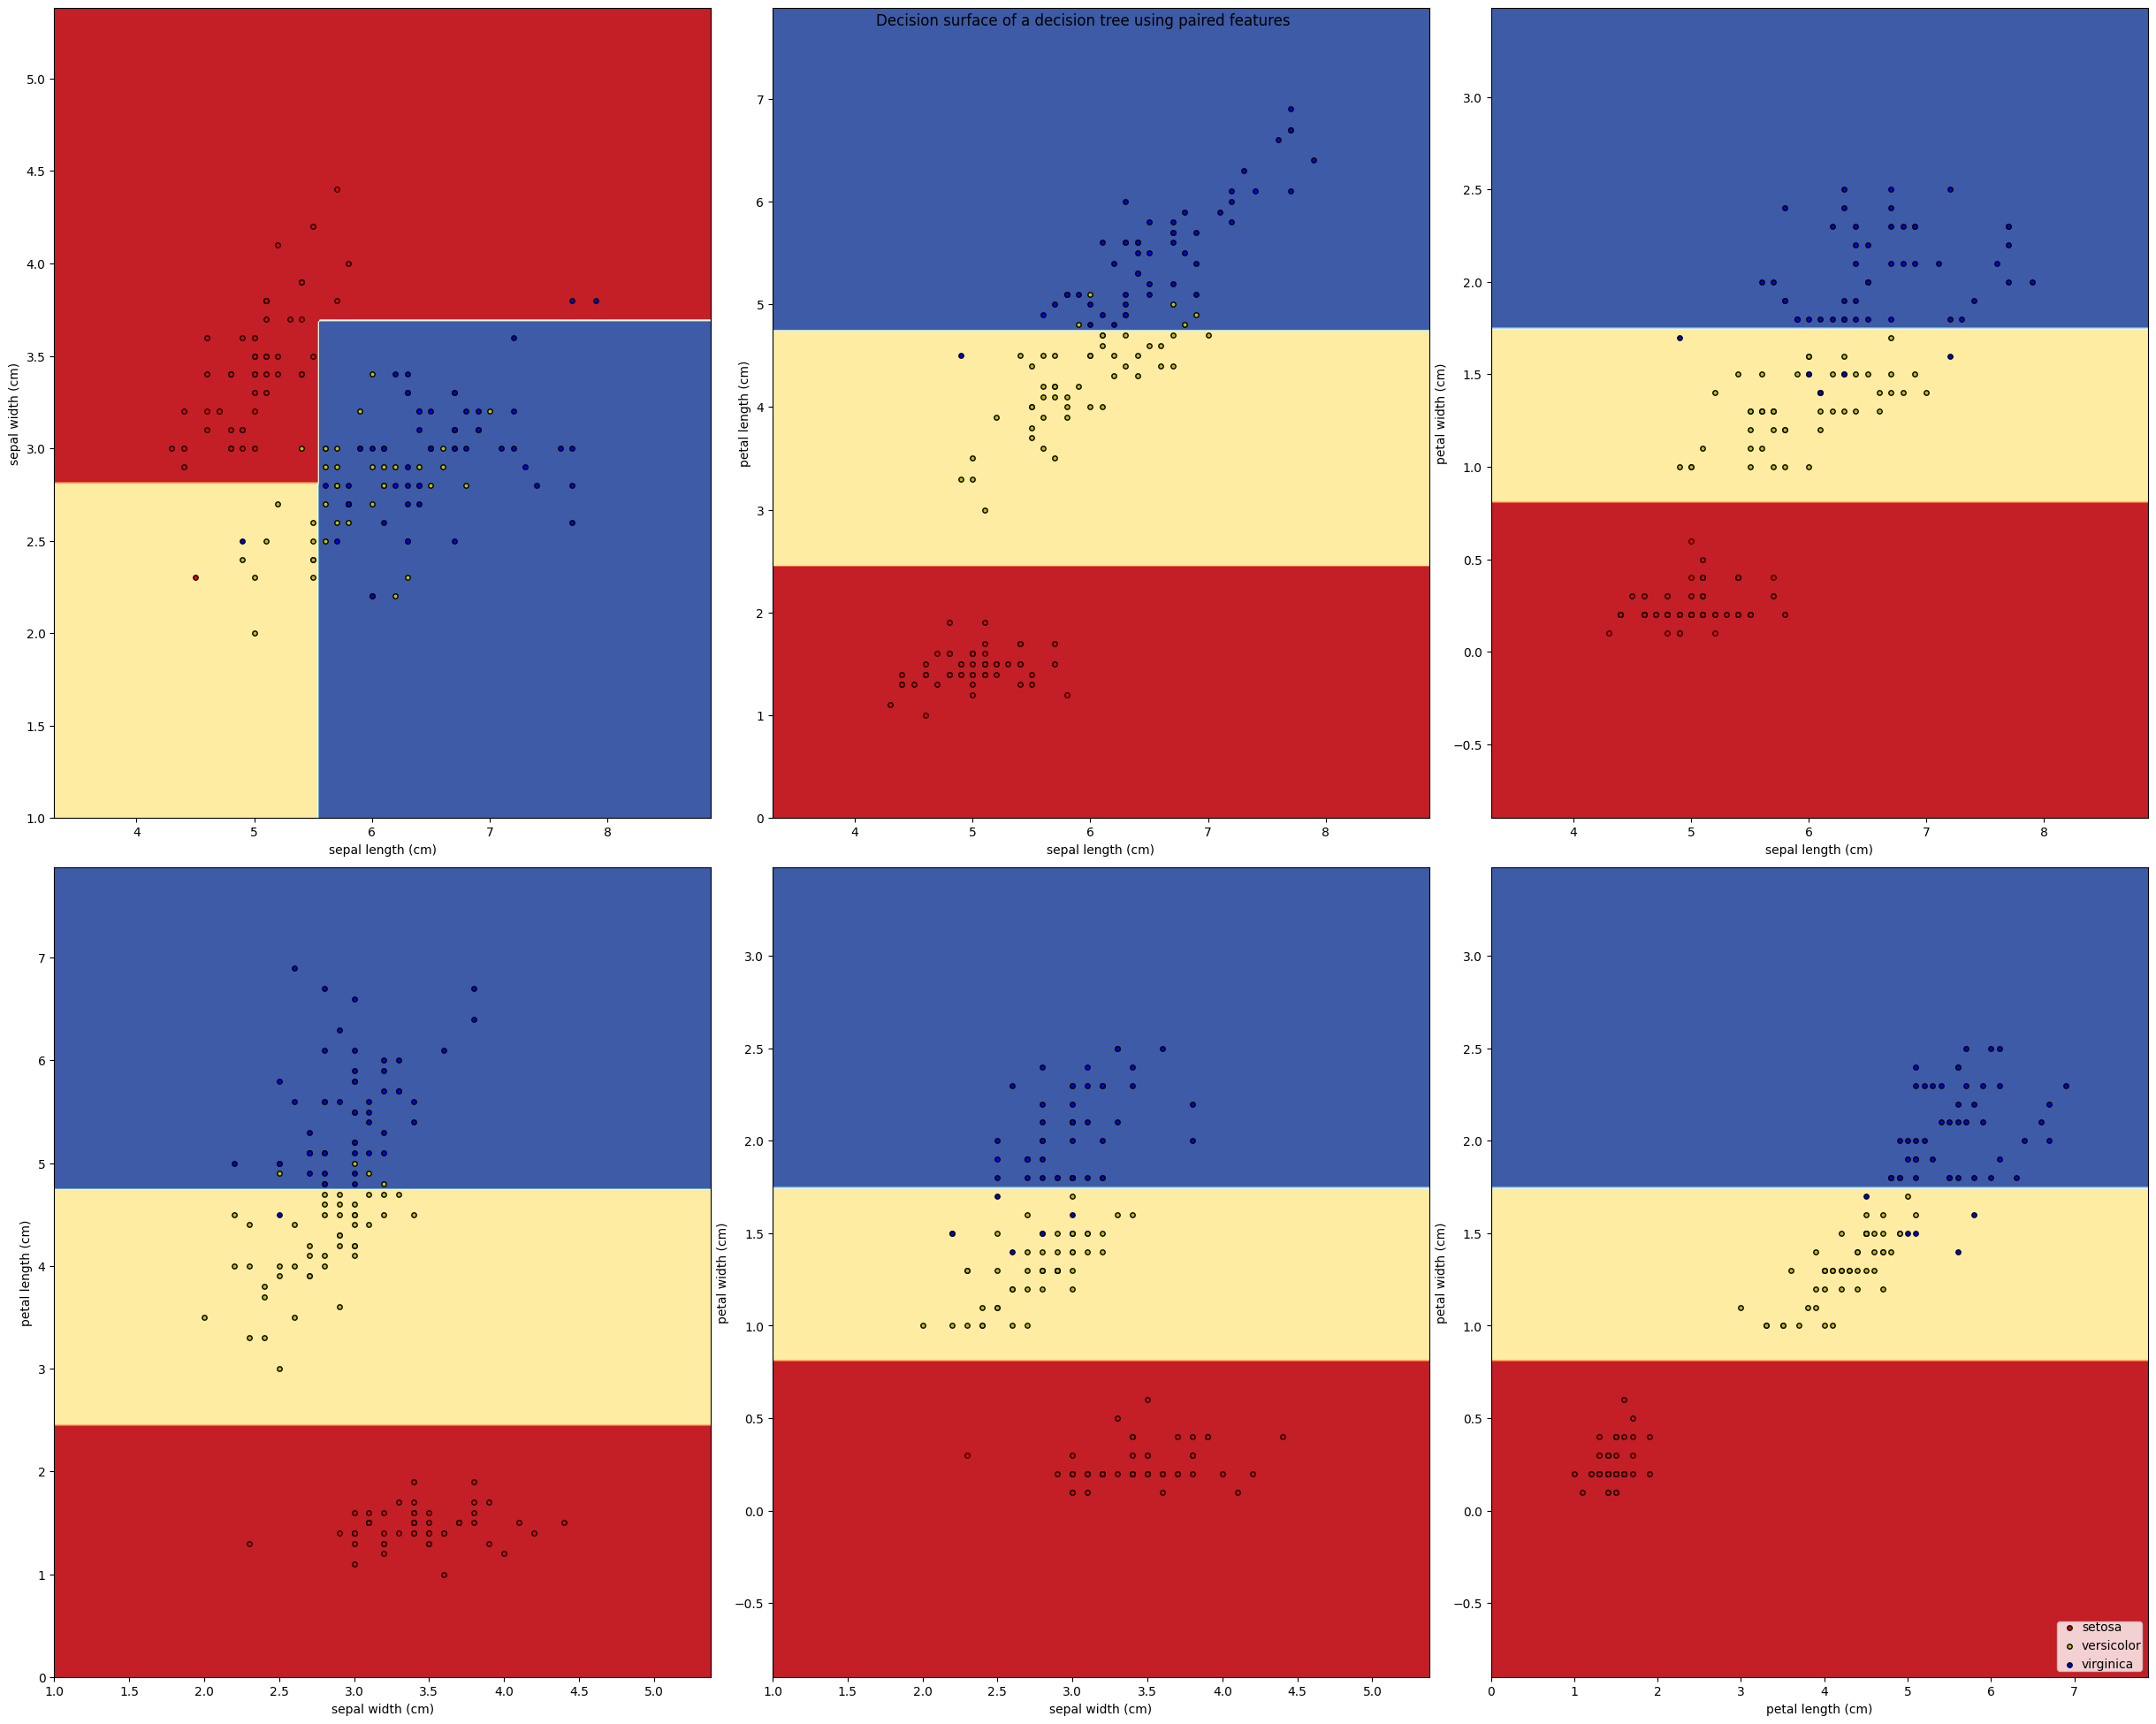

<Figure size 640x480 with 0 Axes>

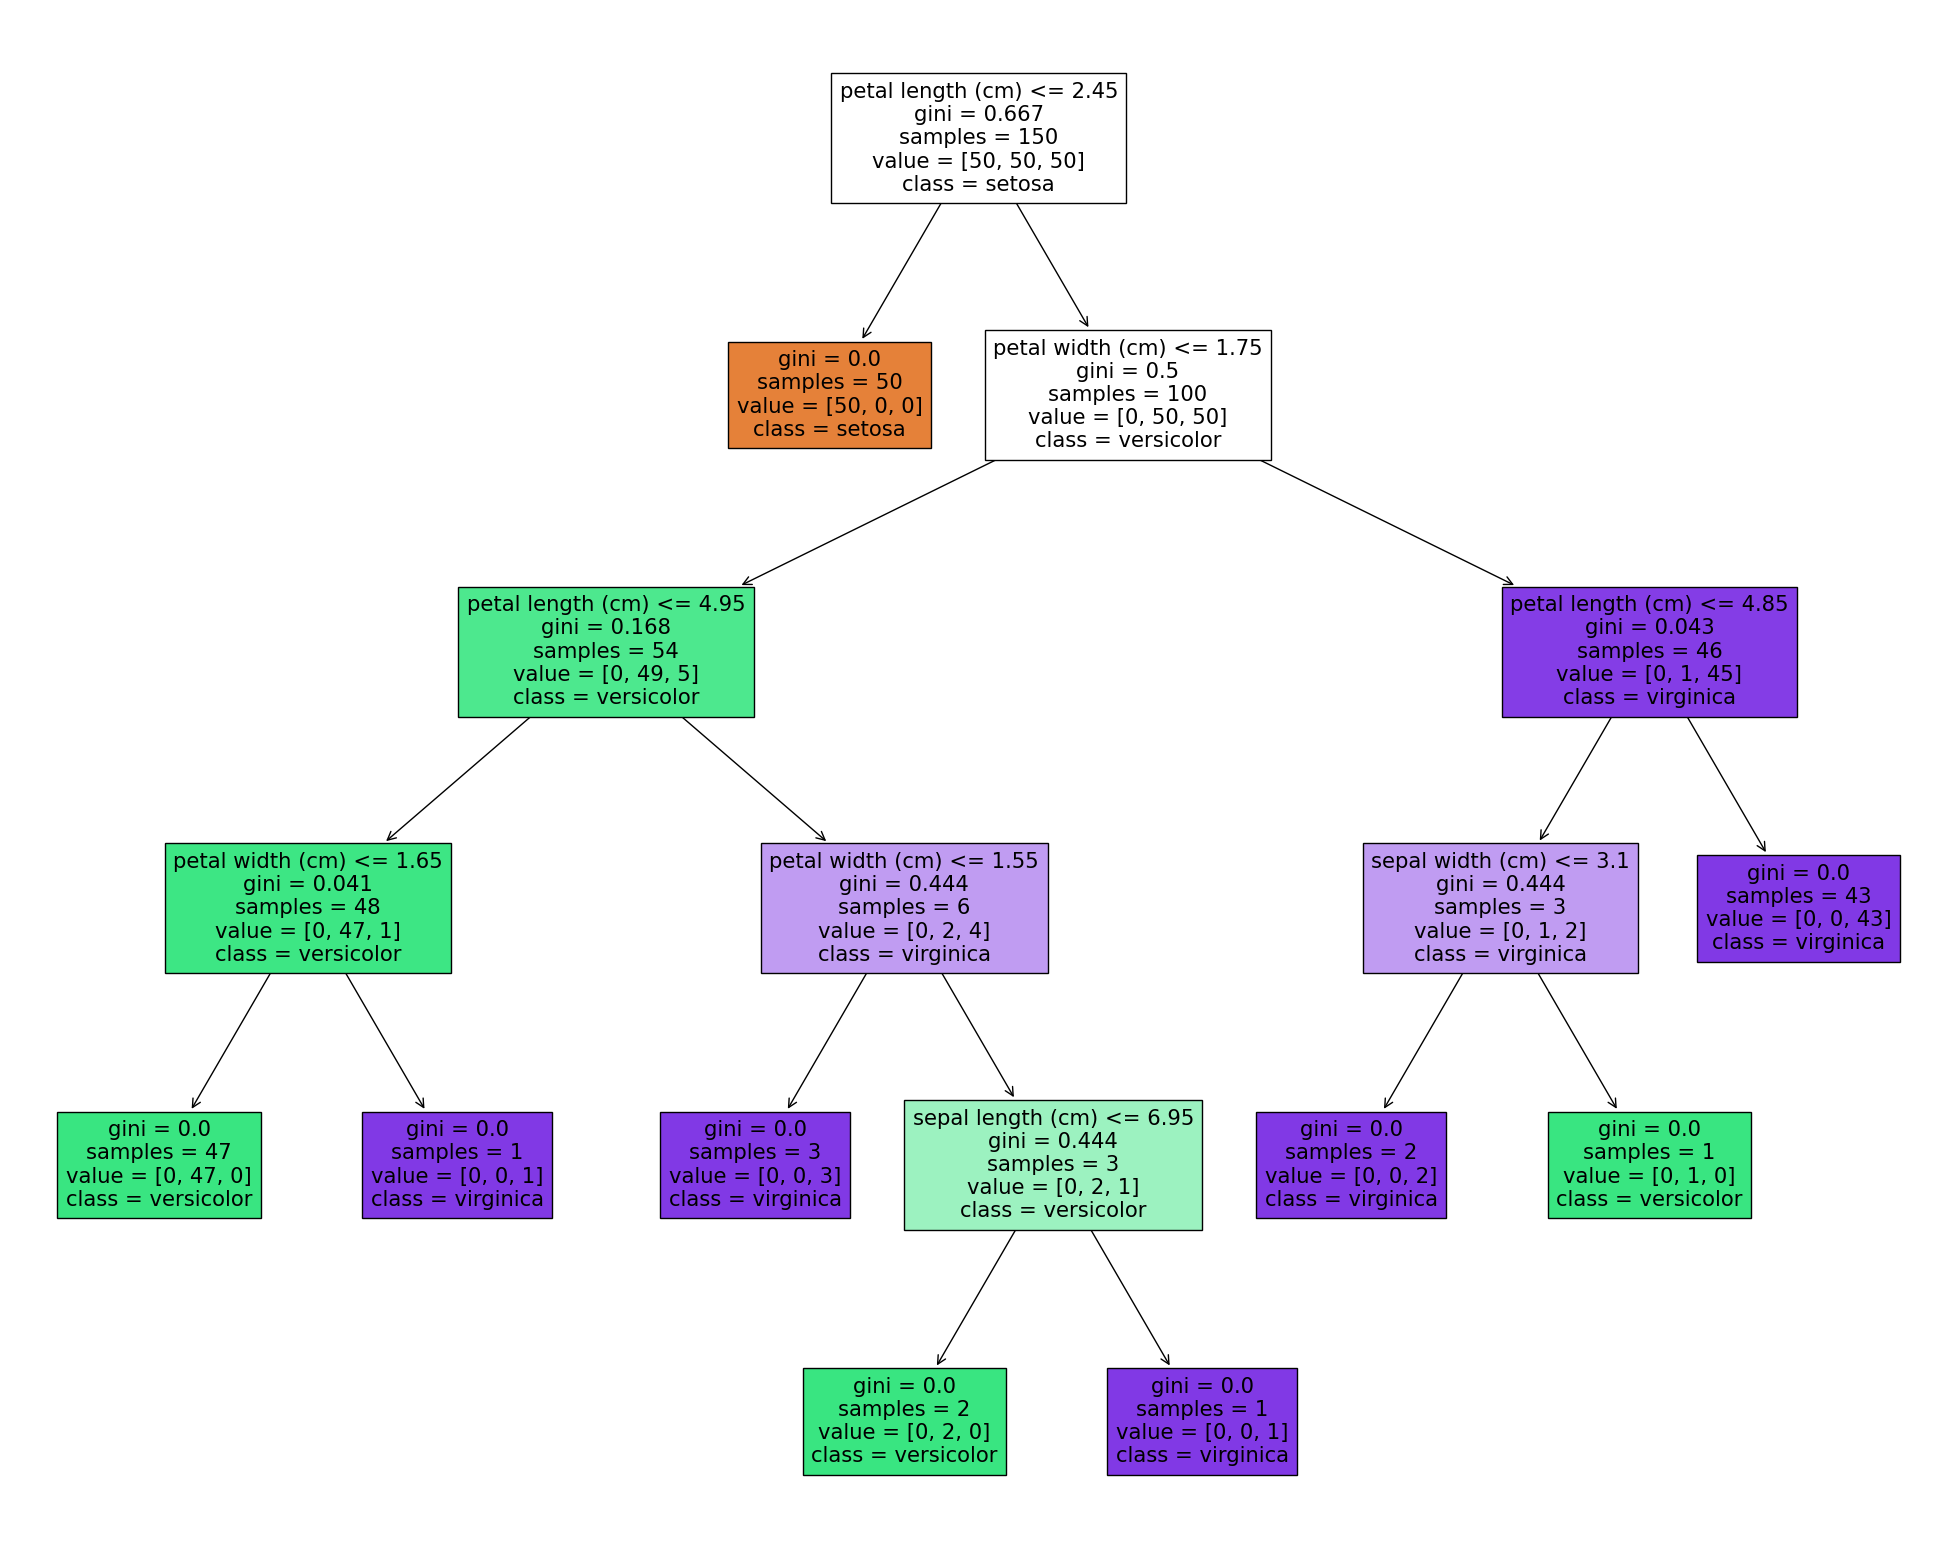

In [ ]:
fig = plt.figure(figsize=(25,20))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")


plt.figure()
fig = plt.figure(figsize=(25,20))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
tree.plot_tree(clf, feature_names=iris.feature_names,
                   class_names=iris.target_names, filled=True)
plt.show()
